<a href="https://colab.research.google.com/github/alon2997/Deep-Learning-Projects/blob/main/predict_%20num%20_of_bicycles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Alon Cohen 208955807, Yonatan Pinkas 207002163** ##



## **Imports** ##

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as notebook_tqdm
import seaborn as sns
import scipy as sp
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error    
from datetime import datetime
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xg
import os
import time

## **Loading the data** ##

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
0,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,5.354100,28.701,0.000000,35
1,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,85.425233,22.961,0.004489,251
2,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032,2.040899,12.301,0.000242,53
3,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981,26.682772,23.781,0.004489,296
4,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980,5.851754,8.201,0.000000,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,2012-01-14 02:00:00,1,0,0,1,6.56,8.335,47,11.0014,14.953355,6.561,0.004489,38
8160,2011-12-10 09:00:00,4,0,0,1,11.48,12.880,61,19.0012,7.977025,11.481,0.000000,149
8161,2011-12-18 16:00:00,4,0,0,1,11.48,13.635,48,16.9979,6.916512,11.481,0.015615,234
8162,2011-02-19 07:00:00,1,0,0,1,15.58,19.695,17,35.0008,0.095445,15.581,0.000242,22


In [ ]:
#Our target is count, we have to split the dataframe to two:
X = df.drop(['count'],axis = 1)
Y = df[['count']]
X,Y

(                 datetime  season  holiday  workingday  weather   temp  \
 0     2011-07-11 00:00:00       3        0           1        1  28.70   
 1     2012-05-18 22:00:00       2        0           1        1  22.96   
 2     2011-04-01 23:00:00       2        0           1        1  12.30   
 3     2012-09-16 09:00:00       3        0           0        1  23.78   
 4     2011-02-01 23:00:00       1        0           1        3   8.20   
 ...                   ...     ...      ...         ...      ...    ...   
 8159  2012-01-14 02:00:00       1        0           0        1   6.56   
 8160  2011-12-10 09:00:00       4        0           0        1  11.48   
 8161  2011-12-18 16:00:00       4        0           0        1  11.48   
 8162  2011-02-19 07:00:00       1        0           0        1  15.58   
 8163  2012-05-02 07:00:00       2        0           1        2  22.14   
 
        atemp  humidity  windspeed  pollution  sunlight   traffic  
 0     32.575        65    12.

In [ ]:
#Split data into train (X_train,Y_train) and test (X_test,Y_test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

## **Exploratory Data Analysis** ##

In [ ]:
#Feature types:
X_train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
pollution     float64
sunlight      float64
traffic       float64
dtype: object

In [ ]:
#Describe data:
X_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic
count,6531.000000,6531.000000,6531.000000,6531.000000,6531.000000,6531.000000,6531.000000,6531.000000,6531.000000,6531.000000,6531.000000
mean,2.513398,0.028173,0.682438,1.418619,20.233698,23.661863,61.703108,12.825760,47.815497,20.234698,0.004940
std,1.118792,0.165480,0.465564,0.633604,7.766792,8.438696,19.298070,8.183028,73.981200,7.766792,0.006297
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000304,0.821000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,3.711823,13.941000,0.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,61.000000,12.998000,17.961242,20.501000,0.000242
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,59.474202,26.241000,0.004489
max,4.000000,1.000000,1.000000,4.000000,39.360000,45.455000,100.000000,56.996900,718.409842,39.361000,0.015615


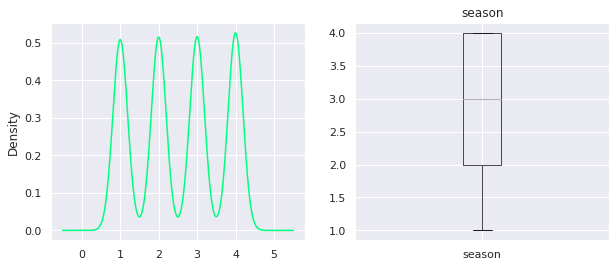

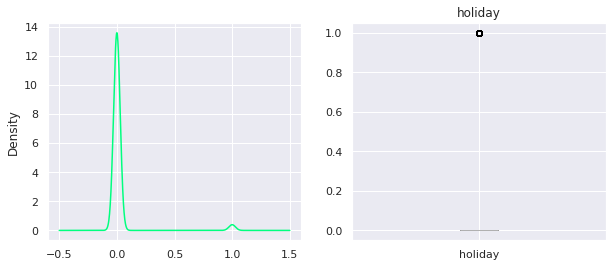

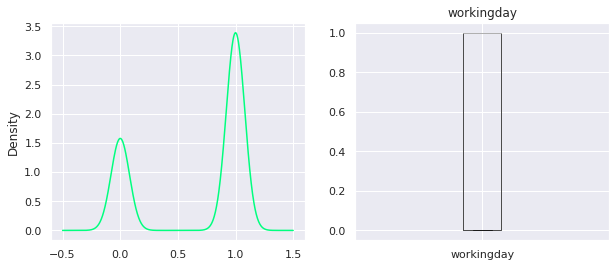

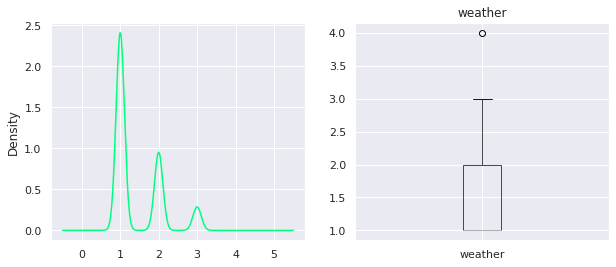

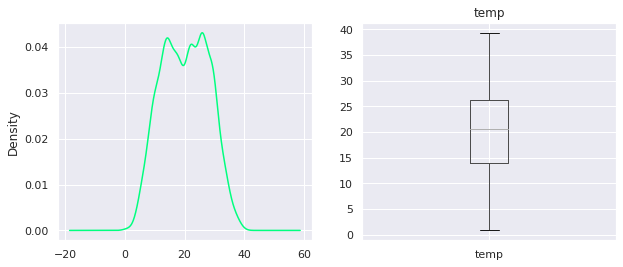

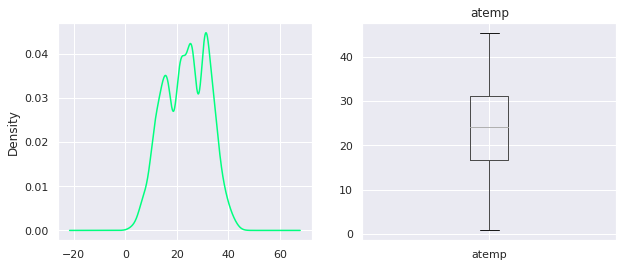

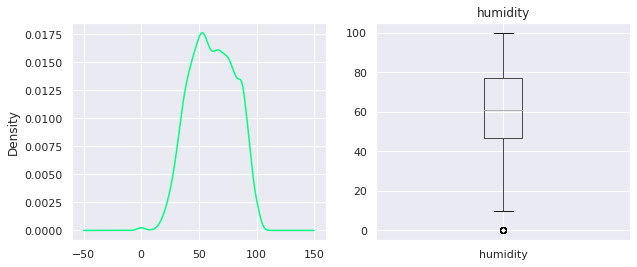

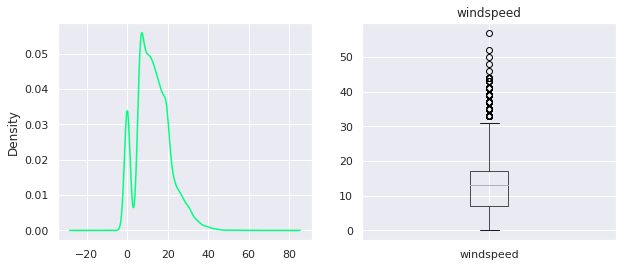

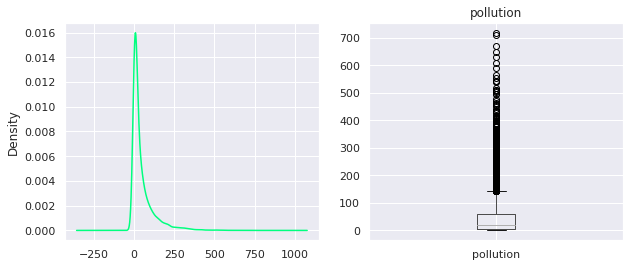

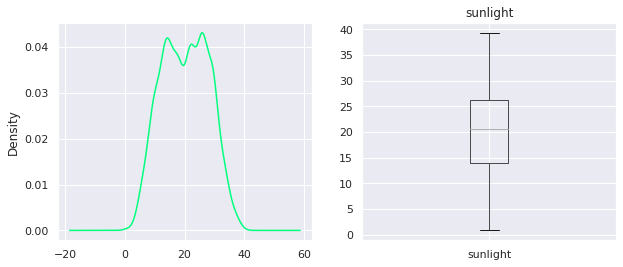

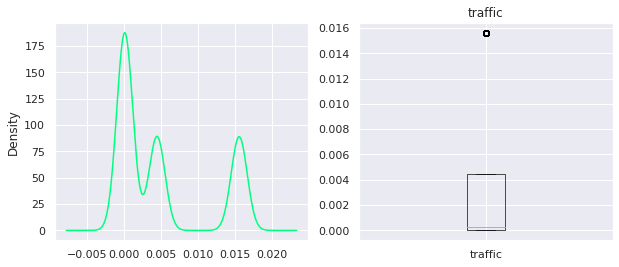

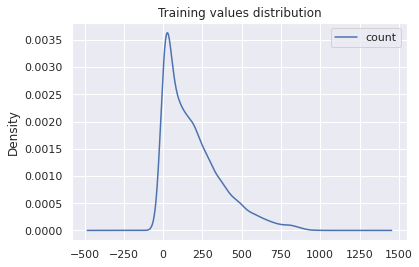

In [ ]:
# Numeric features distributions
# We'll want to see how the different variables distribute, including box plots for outliers
def numeric_features_density(df):
    column_numeric = df.select_dtypes(include = [float,int]).columns.tolist() 
    for col in column_numeric:
        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
        df[col].plot.density(color = 'springgreen', ax = ax1)
        df.boxplot(column = col, ax = ax2)
        plt.title(col)
        plt.show()
numeric_features_density(X_train)
Y_train.plot.density(title = "Training values distribution")



In [ ]:
# Missing values check:
X_train.isnull().sum().sort_values(ascending = False)
# No missing values 

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
pollution     0
sunlight      0
traffic       0
dtype: int64

In [ ]:
# We'll plot the correlations to see if there are some features which we can consider removing 
def corr_features_check(df):
    corr = df.corr(method = 'pearson').abs()
    return corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

corr_features_check(X_train)

# We'll notice that temp, atemp and sunlight are strongly correlated, and so are windspeed and humidity, and weather and humidity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  after removing the cwd from sys.path.


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic
season,1.00,0.03,0.00,0.00,0.25,0.26,0.20,0.14,0.10,0.25,0.00
holiday,0.03,1.00,0.25,0.02,0.01,0.02,0.00,0.01,0.00,0.01,0.01
workingday,0.00,0.25,1.00,0.04,0.03,0.02,0.00,0.01,0.01,0.03,0.00
weather,0.00,0.02,0.04,1.00,0.05,0.05,0.40,0.00,0.07,0.05,0.00
temp,0.25,0.01,0.03,0.05,1.00,0.98,0.06,0.02,0.23,1.00,0.01
atemp,0.26,0.02,0.02,0.05,0.98,1.00,0.04,0.05,0.23,0.98,0.01
humidity,0.20,0.00,0.00,0.40,0.06,0.04,1.00,0.32,0.19,0.06,0.01
windspeed,0.14,0.01,0.01,0.00,0.02,0.05,0.32,1.00,0.05,0.02,0.01
pollution,0.10,0.00,0.01,0.07,0.23,0.23,0.19,0.05,1.00,0.23,0.00
sunlight,0.25,0.01,0.03,0.05,1.00,0.98,0.06,0.02,0.23,1.00,0.01


In [ ]:
# We'll split our datetime feature into a few seperate features for its relevant parts

def handle_datetime(df):
  temp_df = df.copy()
  temp_df['datetime'] = temp_df['datetime'].apply(lambda rows:datetime.fromisoformat(rows))
  temp_df['weekDay'] = temp_df['datetime'].apply(lambda day:day.dayofweek)
  temp_df['Hour'] = temp_df['datetime'].apply(lambda hour:hour.hour)
  temp_df['Month'] = temp_df['datetime'].apply(lambda month:month.month)
  temp_df['Year'] = temp_df['datetime'].apply(lambda year:year.year)
  return temp_df

X_train = handle_datetime(X_train)
X_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,weekDay,Hour,Month,Year
6913,2012-05-19 03:00:00,2,0,0,1,20.50,24.240,48,7.0015,13.327268,20.501,0.000242,5,3,5,2012
7753,2012-12-07 12:00:00,4,0,1,2,13.94,16.665,71,12.9980,11.678911,13.941,0.004489,4,12,12,2012
3780,2012-08-14 07:00:00,3,0,1,2,27.06,30.305,83,6.0032,95.329124,27.061,0.015615,1,7,8,2012
6710,2011-04-16 22:00:00,2,0,0,3,17.22,21.210,100,0.0000,9.297959,17.221,0.000000,5,22,4,2011
4955,2012-01-14 06:00:00,1,0,0,1,5.74,7.575,50,0.0000,0.094263,5.741,0.000000,5,6,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,2012-02-05 14:00:00,1,0,0,1,12.30,15.150,61,11.0014,3.068827,12.301,0.000000,6,14,2,2012
5390,2011-04-14 01:00:00,2,0,1,1,15.58,19.695,76,15.0013,1.976179,15.581,0.000242,3,1,4,2011
860,2011-12-07 10:00:00,4,0,1,3,18.04,21.970,100,6.0032,4.960762,18.041,0.000000,2,10,12,2011
7603,2011-12-15 03:00:00,4,0,1,2,13.12,16.665,70,8.9981,0.073546,13.121,0.000000,3,3,12,2011


In [ ]:
# Let's check our features correlation with our target "count"

label_data = Y_train.squeeze()
label_corrs = X_train.corrwith(label_data).abs()
label_corrs = pd.DataFrame(label_corrs, columns = ['corr_with_label']) 
label_corrs = label_corrs.sort_values('corr_with_label', ascending = False) 
label_corrs.style.background_gradient(cmap = 'GnBu_r') 

# We'll notice that we have some features that are very strongly correlated with
# our target variable, and some that are not correlated at all

,corr_with_label
pollution,0.603211
Hour,0.403436
sunlight,0.388040
temp,0.388040
atemp,0.383650
humidity,0.320399
Year,0.258337
Month,0.163061
season,0.161330
weather,0.131177


In [ ]:
# We'll remove datetime since we split it into other features 

def datetime_remover(df):
    temp_df = df.copy()
    temp_df = temp_df.drop(['datetime'],axis = 1)
    return temp_df

X_train = datetime_remover(X_train)
X_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,weekDay,Hour,Month,Year
6913,2,0,0,1,20.50,24.240,48,7.0015,13.327268,20.501,0.000242,5,3,5,2012
7753,4,0,1,2,13.94,16.665,71,12.9980,11.678911,13.941,0.004489,4,12,12,2012
3780,3,0,1,2,27.06,30.305,83,6.0032,95.329124,27.061,0.015615,1,7,8,2012
6710,2,0,0,3,17.22,21.210,100,0.0000,9.297959,17.221,0.000000,5,22,4,2011
4955,1,0,0,1,5.74,7.575,50,0.0000,0.094263,5.741,0.000000,5,6,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,1,0,0,1,12.30,15.150,61,11.0014,3.068827,12.301,0.000000,6,14,2,2012
5390,2,0,1,1,15.58,19.695,76,15.0013,1.976179,15.581,0.000242,3,1,4,2011
860,4,0,1,3,18.04,21.970,100,6.0032,4.960762,18.041,0.000000,2,10,12,2011
7603,4,0,1,2,13.12,16.665,70,8.9981,0.073546,13.121,0.000000,3,3,12,2011


## **Model selection, Tune Hyperparameters, Choose and train an appropriate model** ##

In [ ]:
# Model selection

models = {'Random forest': None,
          'Linear regression': None,
          'Gradient boosting' : None}

In [ ]:
# To reduce this cells runtime, the optimal parameters were left in the grid 
# search and the previously searched parameters are commented

def run_random_forest(x_train, y_train):
  rf = RandomForestRegressor(n_estimators=1000, random_state=42)
  tuned_rf = GridSearchCV(estimator=rf, 
                          param_grid={'max_features': ['auto'],
                                      'max_depth' : [None],
                                      'min_samples_leaf' : [1]},    
                          scoring='neg_mean_squared_error',
                          cv=3, 
                          verbose=3,
                          refit=True)
  tuned_rf.fit(x_train, y_train)
  return tuned_rf

  # param_grid={'max_features': ['auto', 'log2', 1/3],
  #                                     'max_depth' : [None, 30],
  #                                     'min_samples_leaf' : [1, 2, 4]},    

#Linear Regression
def run_linear_regression(x_train, y_train):
  lr = LinearRegression()
  lr.fit(x_train, np.ravel(y_train))
  cv_score = cross_val_score(lr, x_train, y_train, scoring='neg_mean_squared_error', cv=3)
  return lr, cv_score


#xgboost
def run_xgboost(x_train,y_train):
  xgb = xg.XGBRegressor(n_estimators=1000,random_state=42)
  tuned_xgb = GridSearchCV(estimator=xgb, 
                          param_grid={'max_features': ['auto'],
                                      'max_depth' : [5]},
                          scoring='neg_mean_squared_error',
                          cv=3, 
                          verbose=3,
                          refit=True)
  tuned_xgb.fit(x_train, y_train)
  return tuned_xgb

  #  param_grid={'max_features': ['auto', 'log2', 1/3],
  #                                     'max_depth' : [5, 3, 1]},
  
# Run models:
def run_all_models(x, y):
  models_dict = {}
  models_dict['Random forest'] = run_random_forest(x, y)
  models_dict['Linear regression'] = run_linear_regression(x, y)
  models_dict['xgboost'] = run_xgboost(x,y) 
  return models_dict

In [ ]:
models = run_all_models(X_train, Y_train.values.ravel())

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1;, score=-3410.173 total time=  32.9s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1;, score=-3447.734 total time=  23.1s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1;, score=-3431.080 total time=  23.3s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[22:50:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/3] END max_depth=5, max_features=auto;, score=-2063.297 total time=   4.9s
[22:50:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/3] END max_depth=5, max_features=auto;, score=-2224.431 total time=   4.2s
[22:50:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/3] END max_depth=5, m

In [ ]:
# comparing all CV scores

cv_scores = {}
cv_scores['Random forest'] = models['Random forest'].best_score_
cv_scores['Linear regression'] = models['Linear regression'][1].mean()
cv_scores['xgboost'] = models['xgboost'].best_score_ 
cv_scores

{'Linear regression': -14879.830982674632,
 'Random forest': -3429.6622323850866,
 'xgboost': -2152.415344891349}

In [ ]:
# Let's see what parameters our grid search found 

print(f"Random Forests best parameters are {models['Random forest'].best_params_}")     
print(f"xgboost best parameters are {models['xgboost'].best_params_}") 

Random Forests best parameters are {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1}
xgboost best parameters are {'max_depth': 5, 'max_features': 'auto'}


## **Evaluate the model** ##

In [ ]:
# Before evaluating on test set:

X_test = handle_datetime(X_test)
X_test = datetime_remover(X_test)
X_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,weekDay,Hour,Month,Year
7165,2,0,0,2,25.42,30.305,61,7.0015,7.510678,25.421,0.015615,6,6,6,2011
3862,2,0,1,3,24.60,28.790,78,12.9980,3.550944,24.601,0.004489,0,23,6,2012
3307,4,0,1,1,14.76,17.425,57,15.0013,37.737255,14.761,0.004489,2,20,12,2012
2492,3,0,0,3,32.80,37.120,49,56.9969,54.877070,32.801,0.015615,6,18,7,2011
6783,4,0,1,1,20.50,24.240,77,6.0032,7.907176,20.501,0.000242,4,22,10,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375,1,0,1,1,27.06,31.060,39,16.9979,9.312963,27.061,0.000242,4,14,3,2011
7311,2,0,1,1,27.06,31.060,27,11.0014,55.147058,27.061,0.004489,3,18,5,2012
7243,1,0,1,1,5.74,7.575,69,8.9981,15.585048,5.741,0.004489,2,7,1,2011
4582,1,0,1,2,12.30,14.395,65,12.9980,41.479460,12.301,0.000242,2,7,2,2012


In [ ]:
trained_models_dict = {}
trained_models_dict['Random forest'] = models['Random forest'].best_estimator_
trained_models_dict['Linear regression'] = models['Linear regression'][0]
trained_models_dict['xgboost'] = models['xgboost'].best_estimator_ 
trained_models_dict

{'Linear regression': LinearRegression(),
 'Random forest': RandomForestRegressor(n_estimators=1000, random_state=42),
 'xgboost': XGBRegressor(max_depth=5, max_features='auto', n_estimators=1000,
              random_state=42)}

In [ ]:
# Let's see how our models performed on the test set

def evaluate_single_model(x, y, model):
  y_pred = model.predict(x)
  return np.sqrt(mean_squared_error(y, y_pred))

def evaluate_all_models(x, y, models_dict):
  test_set_scores = {}
  for k, v in models_dict.items():
    test_set_scores[k] = evaluate_single_model(x, y, v)
  return test_set_scores

In [ ]:
test_set_scores = evaluate_all_models(X_test, Y_test, trained_models_dict)
test_set_scores

{'Linear regression': 123.18468518710849,
 'Random forest': 52.785899014170745,
 'xgboost': 44.03852977288356}

In [ ]:
combined_dict = {k: [np.sqrt(np.abs(v)), test_set_scores[k]] for k, v in cv_scores.items()}
scores_df = pd.DataFrame.from_dict(combined_dict, orient='index', columns=['CV score', 'Test set score'])
scores_df

,CV score,Test set score
Random forest,58.563318,52.785899
Linear regression,121.982913,123.184685
xgboost,46.394131,44.038530


## **Feature importance and Explainability** ##

To provide some explainability for our models, we'll check which features (after normalization)
are most "important" in our decision tree models (importance being the features
that cause the largest improvment in our entropy, gini index etc..), and check
which of our linear regression coefficients (after normalization) are largest  

In [ ]:
feature_importance_dict = {}
def find_tree_feature_importance(model, columns):
  importance = model.feature_importances_
  importance *= 100 / np.max(importance)  # Normalize
  importance = pd.DataFrame(importance, index=columns, columns=["Importance"])
  importance = importance.sort_values(by=['Importance'], ascending=False)
  return importance

In [ ]:
feature_importance_dict['Random forest'] = find_tree_feature_importance(trained_models_dict['Random forest'], X_train.columns)
feature_importance_dict['xgboost'] = find_tree_feature_importance(trained_models_dict['xgboost'], X_train.columns)

In [ ]:
def find_normalized_lr_feautre_importance(model, x_train):
  coefficients = {x_train.columns[i]: np.abs(model.coef_[i]) for i in range(len(x_train.columns))}
  coefficients_df = pd.DataFrame.from_dict(coefficients, orient='index', columns=['Importance'])
  coefficients_df['Importance'] *=  x_train.std()
  coefficients_df['Importance'] *= 100 / coefficients_df['Importance'] .max()
  importance = coefficients_df.sort_values(by=['Importance'], ascending=False)
  return importance

In [ ]:
feature_importance_dict['Linear regression'] = find_normalized_lr_feautre_importance(trained_models_dict['Linear regression'], X_train)

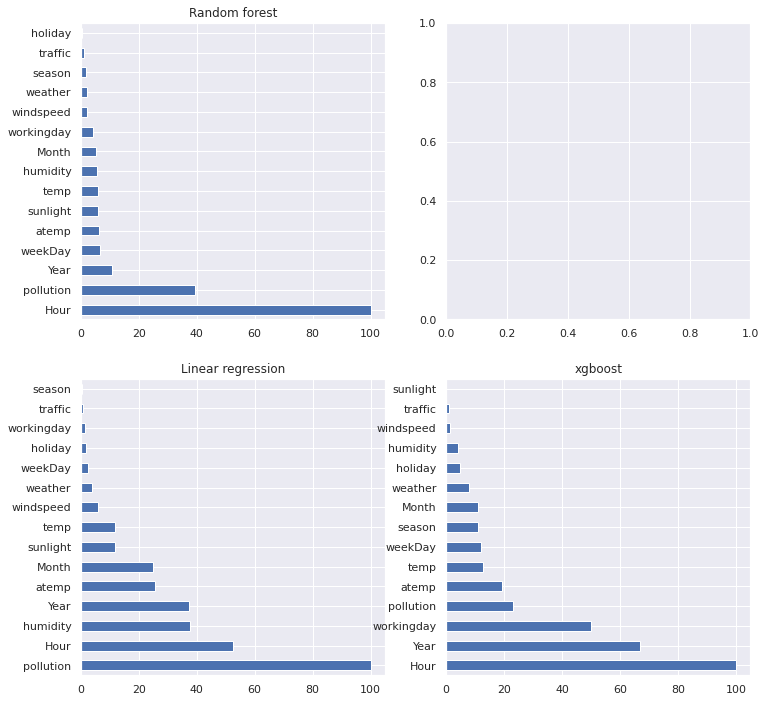

In [ ]:
sns.set() 

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
feature_importance_dict['Random forest'].plot(kind='barh', ax=axes[0, 0], legend=False, title='Random forest')
feature_importance_dict['Linear regression'].plot(kind='barh', ax=axes[1, 0], legend=False, title='Linear regression')
feature_importance_dict['xgboost'].plot(kind = 'barh', ax = axes[1, 1], legend = False, title = 'xgboost')

In [ ]:

# Since we would like to reduce our models dimensionality as much as possible while
# still maintaining important features, we'll check what happens when we remove our
# three least important features

weak_features_dict = {} 
for k, v in feature_importance_dict.items():
  weak_features_dict[k] = list(v.index.values[-3:])
weak_features_dict

{'Linear regression': ['workingday', 'traffic', 'season'],
 'Random forest': ['season', 'traffic', 'holiday'],
 'xgboost': ['windspeed', 'traffic', 'sunlight']}

## **Removing Features (Can we do better?)** ##

In [ ]:
# We are removing features by: high correlation between 2 features (temp), low feature correlation with label (holiday, traffic)
# feature importance graphs \ weak features (sunlight, season)

def feature_remover(df):
    temp_df = df.copy()
    temp_df = temp_df.drop(['season','traffic','holiday','temp','sunlight'],axis = 1)
    return temp_df

X_train = feature_remover(X_train)
X_train

,workingday,weather,atemp,humidity,windspeed,pollution,weekDay,Hour,Month,Year
6913,0,1,24.240,48,7.0015,13.327268,5,3,5,2012
7753,1,2,16.665,71,12.9980,11.678911,4,12,12,2012
3780,1,2,30.305,83,6.0032,95.329124,1,7,8,2012
6710,0,3,21.210,100,0.0000,9.297959,5,22,4,2011
4955,0,1,7.575,50,0.0000,0.094263,5,6,1,2012
...,...,...,...,...,...,...,...,...,...,...
5226,0,1,15.150,61,11.0014,3.068827,6,14,2,2012
5390,1,1,19.695,76,15.0013,1.976179,3,1,4,2011
860,1,3,21.970,100,6.0032,4.960762,2,10,12,2011
7603,1,2,16.665,70,8.9981,0.073546,3,3,12,2011


In [ ]:
def run_all_models(x, y):
  models_dict = {}
  models_dict['Random forest'] = run_random_forest(x, y)
  models_dict['Linear regression'] = run_linear_regression(x, y)
  models_dict['xgboost'] = run_xgboost(x, y)
  return models_dict

In [ ]:
models = run_all_models(X_train, Y_train.values.ravel()) 
models

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1;, score=-3328.517 total time=  18.6s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1;, score=-3307.869 total time=  19.1s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1;, score=-3318.069 total time=  17.9s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[22:52:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/3] END max_depth=5, max_features=auto;, score=-2017.843 total time=   3.5s
[22:52:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/3] END max_depth=5, max_features=auto;, score=-2307.769 total time=   3.5s
[22:52:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/3] END max_depth=5, m

{'Linear regression': (LinearRegression(),
  array([-15455.52242076, -14083.13902403, -15080.7242511 ])),
 'Random forest': GridSearchCV(cv=3,
              estimator=RandomForestRegressor(n_estimators=1000,
                                              random_state=42),
              param_grid={'max_depth': [None], 'max_features': ['auto'],
                          'min_samples_leaf': [1]},
              scoring='neg_mean_squared_error', verbose=3),
 'xgboost': GridSearchCV(cv=3, estimator=XGBRegressor(n_estimators=1000, random_state=42),
              param_grid={'max_depth': [5], 'max_features': ['auto']},
              scoring='neg_mean_squared_error', verbose=3)}

In [ ]:
cv_scores = {}
cv_scores['Random forest'] = models['Random forest'].best_score_
cv_scores['Linear regression'] = models['Linear regression'][1].mean()
cv_scores['xgboost'] = models['xgboost'].best_score_
cv_scores

{'Linear regression': -14873.128565297522,
 'Random forest': -3318.1515639505433,
 'xgboost': -2175.8146075244063}

## **Evaluate the model again (after removing features)** ##

In [ ]:
#Before evaluating on test set after removing features

X_test = feature_remover(X_test)
X_test

,workingday,weather,atemp,humidity,windspeed,pollution,weekDay,Hour,Month,Year
7165,0,2,30.305,61,7.0015,7.510678,6,6,6,2011
3862,1,3,28.790,78,12.9980,3.550944,0,23,6,2012
3307,1,1,17.425,57,15.0013,37.737255,2,20,12,2012
2492,0,3,37.120,49,56.9969,54.877070,6,18,7,2011
6783,1,1,24.240,77,6.0032,7.907176,4,22,10,2012
...,...,...,...,...,...,...,...,...,...,...
3375,1,1,31.060,39,16.9979,9.312963,4,14,3,2011
7311,1,1,31.060,27,11.0014,55.147058,3,18,5,2012
7243,1,1,7.575,69,8.9981,15.585048,2,7,1,2011
4582,1,2,14.395,65,12.9980,41.479460,2,7,2,2012


In [ ]:
trained_models_dict = {}
trained_models_dict['Random forest'] = models['Random forest'].best_estimator_
trained_models_dict['Linear regression'] = models['Linear regression'][0]
trained_models_dict['xgboost'] = models['xgboost'].best_estimator_
trained_models_dict

{'Linear regression': LinearRegression(),
 'Random forest': RandomForestRegressor(n_estimators=1000, random_state=42),
 'xgboost': XGBRegressor(max_depth=5, max_features='auto', n_estimators=1000,
              random_state=42)}

In [ ]:
def evaluate_all_models(x, y, models_dict):
  test_set_scores = {}
  for k, v in models_dict.items():
    test_set_scores[k] = evaluate_single_model(x, y, v)
  return test_set_scores

In [ ]:
test_set_scores = evaluate_all_models(X_test, Y_test, trained_models_dict) #HEREEEEE
test_set_scores

{'Linear regression': 123.1533685710355,
 'Random forest': 52.11393867739141,
 'xgboost': 44.482902668849285}

In [ ]:
combined_dict = {k: [np.sqrt(np.abs(v)), test_set_scores[k]] for k, v in cv_scores.items()}
combined_dict

{'Linear regression': [121.95543680089675, 123.1533685710355],
 'Random forest': [57.603398892344394, 52.11393867739141],
 'xgboost': [46.64562795723096, 44.482902668849285]}

In [ ]:
new_scores_df = pd.DataFrame.from_dict(combined_dict, orient='index', columns=['CV score removed features', 'Test set score removed features'])
new_scores_df

,CV score removed features,Test set score removed features
Random forest,57.603399,52.113939
Linear regression,121.955437,123.153369
xgboost,46.645628,44.482903


In [ ]:
# We can see that removing some of the features slightly improves random forests
# preformance, barely affects linear regression and slightly hurts xgboost

combined_df = pd.concat([scores_df, new_scores_df], axis=1, ignore_index=False)
combined_df

,CV score,Test set score,CV score removed features,Test set score removed features
Random forest,58.563318,52.785899,57.603399,52.113939
Linear regression,121.982913,123.184685,121.955437,123.153369
xgboost,46.394131,44.038530,46.645628,44.482903


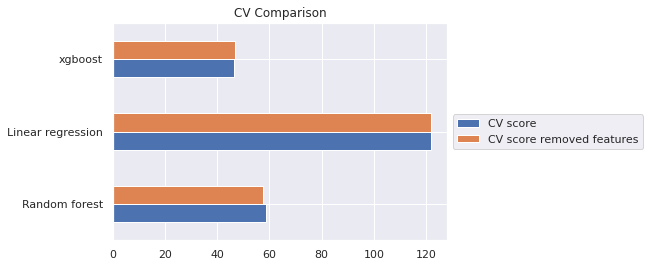

In [ ]:
combined_df[['CV score', 'CV score removed features']].plot(kind='barh', title = 'CV Comparison').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

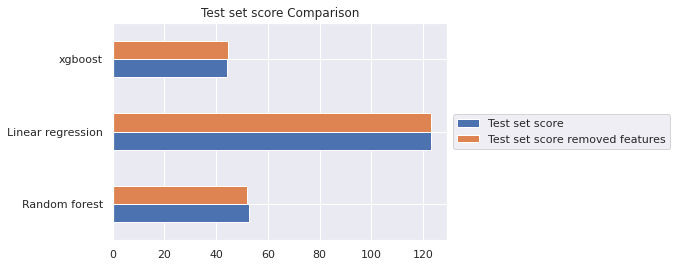

In [ ]:
combined_df[['Test set score', 'Test set score removed features']].plot(kind='barh', title = 'Test set score Comparison').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


## **Using full training data to increase the amount of training samples before evaluation on test.csv** ##

In [ ]:
# We'll use the original full training data to increase the amount of training samples for our models
# Since we're using different training data, we'll rerun or grid search

full_train_X = df.drop(['count'],axis = 1)
full_train_Y = df[['count']]
full_train_X = handle_datetime(full_train_X)
full_train_X = datetime_remover(full_train_X)
full_train_X = feature_remover(full_train_X)

models = {'Random forest': None,
          'xgboost': None,
          'Linear regression' : None}

#Random Forest

def run_random_forest(x_train, y_train):
  rf = RandomForestRegressor(n_estimators=1000, random_state=42)
  tuned_rf = GridSearchCV(estimator=rf, 
                          param_grid={'max_features': ['auto', 'log2', 1/3],
                                      'max_depth' : [None, 30],
                                      'min_samples_leaf' : [1, 2, 4]},     
                          scoring='neg_mean_squared_error',
                          cv=3, 
                          verbose=3,
                          refit=True)
  tuned_rf.fit(x_train, y_train)
  return tuned_rf

  

#Linear Regression
def run_linear_regression(x_train, y_train):
  lr = LinearRegression()
  lr.fit(x_train, np.ravel(y_train))
  cv_score = cross_val_score(lr, x_train, y_train, scoring='neg_mean_squared_error', cv=3)
  return lr, cv_score


#xgboost
def run_xgboost(x_train,y_train):
  xgb = xg.XGBRegressor(n_estimators=1000,random_state=42)
  tuned_xgb = GridSearchCV(estimator=xgb, 
                          param_grid={'max_features': ['auto', 'log2', 1/3],
                                      'max_depth' : [5, 3, 1]},
                          scoring='neg_mean_squared_error',
                          cv=3, 
                          verbose=3,
                          refit=True)
  tuned_xgb.fit(x_train, y_train)
  return tuned_xgb

   


#Run models:
def run_all_models(x, y):
  models_dict = {}
  t1 = time.perf_counter()
  models_dict['Random forest'] = run_random_forest(x, y)
  t2 = time.perf_counter()
  print(f'Random forest fit took {t2-t1} seconds')
  t1 = time.perf_counter()
  models_dict['Linear regression'] = run_linear_regression(x, y)
  t2 = time.perf_counter()
  print(f'Linear regression fit took {t2 - t1} seconds')
  t1 = time.perf_counter()
  models_dict['xgboost'] = run_xgboost(x,y)
  t2 = time.perf_counter()
  print(f'XGBoost fit took {t2 - t1} seconds')
  return models_dict


models = run_all_models(full_train_X, full_train_Y.values.ravel())

print(models['Random forest'].best_params_)
print(models['xgboost'].best_params_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1;, score=-2742.741 total time=  22.1s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1;, score=-3169.227 total time=  22.0s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1;, score=-2955.942 total time=  21.9s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2;, score=-2774.806 total time=  18.8s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2;, score=-3170.919 total time=  18.8s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2;, score=-2991.708 total time=  18.8s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=4;, score=-3040.168 total time=  16.3s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=4;, score=-3372.398 total time=  16.4s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=4;, score=-3262.926 total time=  16.3s
[CV

## **Evaluate on test.csv** ##

In [ ]:

test = pd.read_csv("https://raw.githubusercontent.com/odedovadia/AdvancedMLDLCourse/main/Assignments/Assignment%20I/test.csv")
test = handle_datetime(test)
test = datetime_remover(test)
test = feature_remover(test)
real = test[['count']]
test = test.drop(['count'],axis = 1)
test

,workingday,weather,atemp,humidity,windspeed,pollution,weekDay,Hour,Month,Year
0,1,1,40.150,59,0.0000,10.317020,1,11,7,2011
1,0,1,6.820,54,6.0032,3.502209,0,6,1,2012
2,0,1,11.365,48,12.9980,25.945915,6,18,12,2011
3,1,2,34.090,62,12.9980,116.935908,2,10,8,2012
4,1,1,31.060,53,16.9979,120.824789,4,23,6,2012
...,...,...,...,...,...,...,...,...,...,...
2717,0,1,24.240,29,27.9993,44.665581,5,15,3,2011
2718,0,1,20.455,37,19.9995,31.090380,6,16,1,2012
2719,1,1,31.060,74,8.9981,1.075298,0,5,7,2011
2720,0,1,31.060,65,11.0014,2.291586,5,8,7,2011


In [ ]:
#Evaluating on real test set: random_forest

t1 = time.perf_counter()
print(f"Random Forest test RMSE is {evaluate_single_model(test, real, models['Random forest'].best_estimator_)}")
t2 = time.perf_counter()
print(f"Predicting target with Random Forest took {t2-t1}")

Random Forest test RMSE is 45.82016732780264
Predicting target with Random Forest took 0.8580202980010654


In [ ]:
#Evaluating on real test set: xgboost

t1 = time.perf_counter()
print(f"XGBoost test RMSE is {evaluate_single_model(test, real, models['xgboost'].best_estimator_)}")
t2 = time.perf_counter()
print(f"Predicting target with XGBoost took {t2 - t1}")


XGBoost test RMSE is 40.18618743572471
Predicting target with XGBoost took 0.16001454800061765


In [ ]:
#Evaluating on real test set: linear regression

t1 = time.perf_counter()
print(f"Linear regression RMSE is {evaluate_single_model(test, real, models['Linear regression'][0])}")
t2 = time.perf_counter()
print(f"Predicting target with Linear Regression took {t2 - t1}")

Linear regression RMSE is 118.40014086576502
Predicting target with Linear Regression took 0.0049525909998919815


In [ ]:
#Our predictions table: (of our best model XGBoost)
y_pred = models['xgboost'].best_estimator_.predict(test)
y_pred = pd.DataFrame(y_pred,columns = ['Predictions'])
y_pred

,Predictions
0,126.544144
1,0.809276
2,156.535721
3,218.107437
4,248.994431
...,...
2717,287.213318
2718,291.508972
2719,18.860163
2720,134.660767


Random Forest fit took 667.56 seconds + 0.85 inference = 668.41 second total

Linear Regression fit took 0.033 seconds + 0.004 inference = 0.037 seconds total

XGBoost fit took 81.81 seconds + 0.16 inference = 81.97 seconds total


## **Generate CSV file** ##

In [ ]:
# Keep keys the same, and replace values according to your results and the specified type 

results = {'model': ['Random Forest', 'XGBoost', 'Linear regression'],
           'Score (RMSE)': ['45.82', '40.18', '118.4'],
           'Hyperparams used': [['max_features:auto', 'max_depth:None', 'min_samples_leaf:1'], ['max_features:auto','max_depth:5'], ['-']],
           'Features dropped': [['season,temp,sunlight,traffic,holiday'], ['season,temp,sunlight,traffic,holiday'], ['season,temp,sunlight,traffic,holiday']],
           'New features created': [['weekday,hour,month,year'], ['weekday,hour,month,year'], ['weekday,hour,month,year']],
           'Runtime trainining + inference (seconds)': ['668.41', '81.97', '0.037'],
           'Hardware used (GPU/CPU/TPU)': ['CPU', 'CPU', 'CPU'],
           'Explainability (top 3 features)': [['hour,pollution,year'], ['hour,year,workingday'], ['pollution,hour,humidity']]
           }

results = pd.DataFrame(results)
results

,model,Score (RMSE),Hyperparams used,Features dropped,New features created,Runtime trainining + inference (seconds),Hardware used (GPU/CPU/TPU),Explainability (top 3 features)
0,Random Forest,45.82,"[max_features:auto, max_depth:None, min_sample...","[season,temp,sunlight,traffic,holiday]","[weekday,hour,month,year]",668.41,CPU,"[hour,pollution,year]"
1,XGBoost,40.18,"[max_features:auto, max_depth:5]","[month,temp,sunlight,traffic,holiday]","[weekday,hour,year]",81.97,CPU,"[hour,year,workingday]"
2,Linear regression,118.4,[-],"[season,temp,sunlight,traffic,holiday]","[weekday,hour,month,year]",0.037,CPU,"[pollution,hour,humidity]"


In [ ]:
from google.colab import files
results.to_csv(os.path.join(os.getcwd(), 'exercise1.csv'))
files.download('exercise1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>